## Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Use variable path 
path = r'/Users/rose/Documents/Career Foundry/Instacart Basket Analysis'

In [3]:
# Import most recent version of dataframe: orders_products_customers_combined.pkl from 4.9 Part 1 Data Wrangling notebook
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_combined.pkl'))

In [4]:
instacart.shape

(30629741, 33)

In [5]:
instacart.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


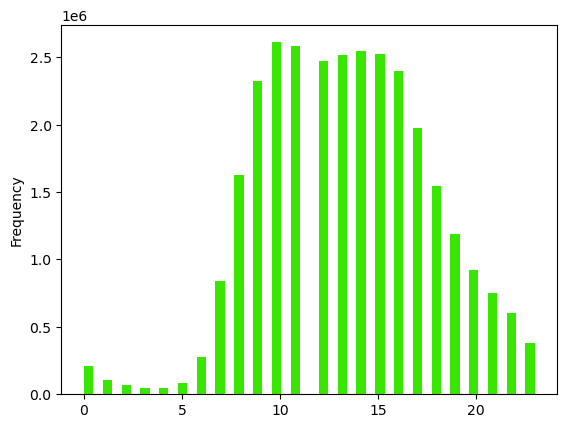

In [6]:
# Task 3 Create a histogram of the “order_hour_of_day” column
hist = instacart['order_hour_of_day'].plot.hist(bins = 48, color = '#39e600')

The histogram indicates that peak period, where customers tend to order the most, are between the hours of 8am to 6pm--a contiguous of 11 hours during the day. During this peak period, aggregate order reach around at least 1.5 million per hour. The peak hours, corresponding to over 2.5 million per hour orders are 10am, 11am, 1pm, 2pm, and 3pm. Early hours between 12am to 6am are the slowest in terms of order. Noontime, 12 pm, is within peak period, but slightly lower than 2.5 million orders.

In [7]:
# Export chart to visualization folder
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hod.png'))

In [8]:
# Task 4 Distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.
column_list = instacart.columns.tolist()

In [9]:
instacart['loyalty_flag'].value_counts()

loyalty_flag
Loyal customer      13410522
Regular customer    11317058
New customer         5902161
Name: count, dtype: int64

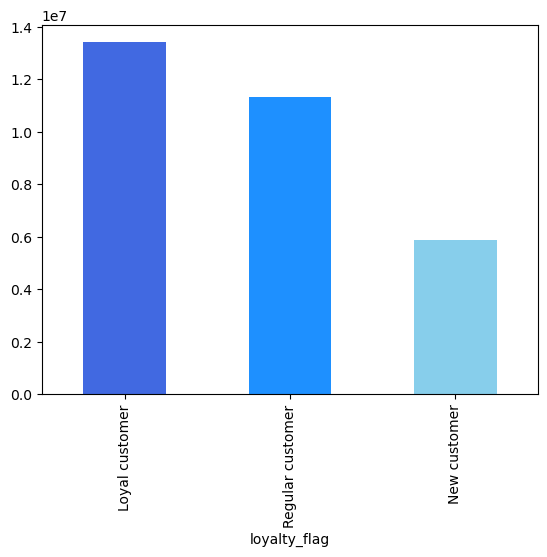

In [10]:
# Create and save a bar chart
bar = instacart['loyalty_flag'].value_counts().plot.bar(color=['royalblue','dodgerblue', 'skyblue'])

In [11]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [12]:
# Task 5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Use an accurate sample for your line chart!)

In [13]:
# Data sampling: create a random sample by setting a seed
np.random.seed(4)
dev = np.random.rand(len(instacart)) <= 0.7

In [14]:
# Create subsets (big for 70% of dataframe and our sample--small, for 30% of dataframe)

In [15]:
big = instacart[dev]

In [16]:
small = instacart[~dev]

In [17]:
# Check if subsets equal the whole, dataframe by using len() function

In [18]:
len(instacart)

30629741

In [19]:
len(big)

21441757

In [20]:
len(small)

9187984

In [21]:
len(big) + len(small)

30629741

In [22]:
# Use 'small' subset for subsequent steps to find out expenditure patterns ('prices') depending on 'order_hour_of_day'

In [23]:
# Use only the columns needed, : 'instacart_subset'

In [24]:
instacart_subset = small[['order_hour_of_day', 'prices']]

In [25]:
instacart_subset.head(2)

,order_hour_of_day,prices
0,8,9.0
2,12,9.0


In [26]:
# Use the pared-down subset of small: instacart_subset to create a line chart

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


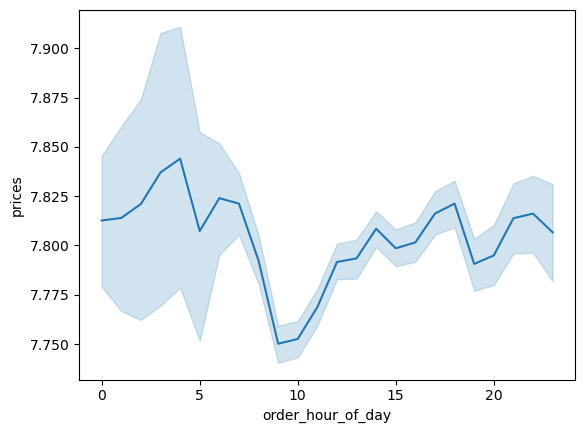

In [27]:
# Create and save a lineplot
line = sns.lineplot(data = instacart_subset, x = 'order_hour_of_day',y = 'prices')

In [28]:
# Export the chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hod.png'))

In [29]:
# Task 6 Connection between ‘age’ and ‘ ’n_dependants’

In [30]:
# Use only the columns needed from the sample, ‘small’:
instacart_family = small[['age', 'n_dependants']]

In [31]:
# Check columns, using head() function
instacart_family.head(2)

,age,n_dependants
0,31,3
2,31,3


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


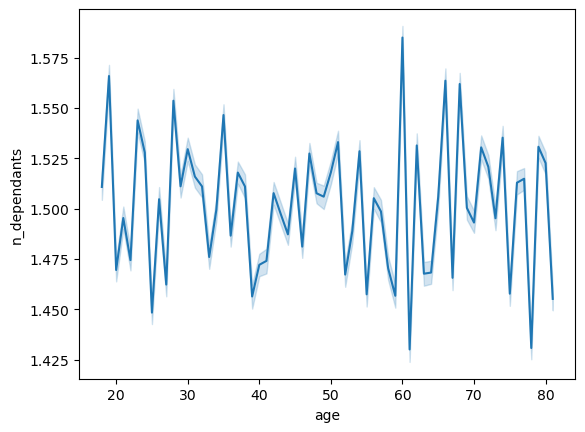

In [32]:
# Create a line chart
line = sns.lineplot(data = instacart_family, x = 'age', y = 'n_dependants')

The line chart above offers no clear patterns in terms of connection between age and number of dependents. 

In [33]:
# Export chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_n_dependants.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


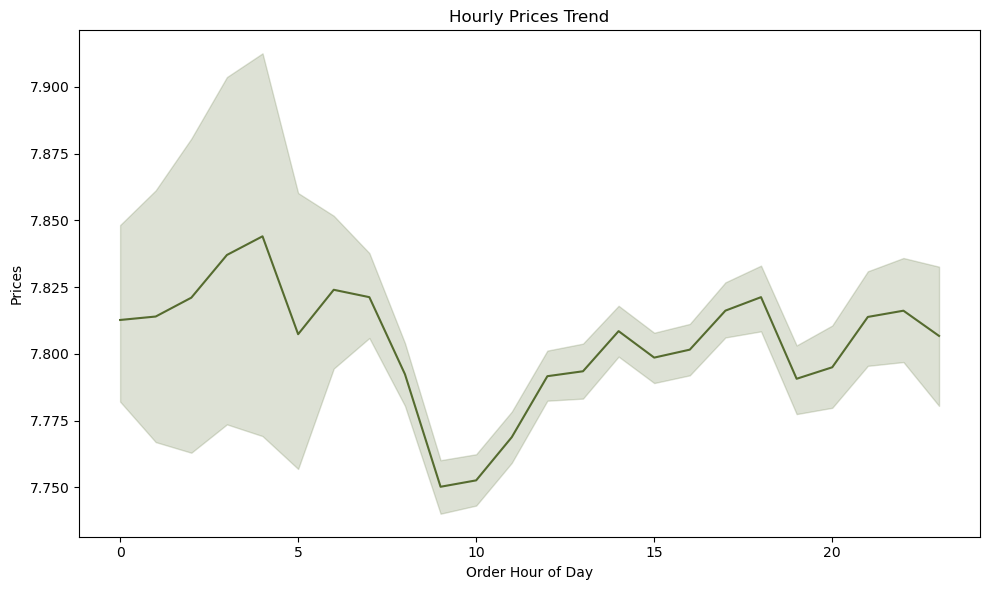

In [34]:
# Create and save a lineplot
plt.figure(figsize = (10, 6))  # Adjust the figure size for better readability
line = sns.lineplot(data = instacart_subset, x = 'order_hour_of_day', y = 'prices', color = 'darkolivegreen')
line.set_xlabel('Order Hour of Day')
line.set_ylabel('Prices')
plt.title('Hourly Prices Trend')
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

In [35]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour.png'))

In [36]:
# Task 7  Connection between ‘age’ and ‘ ’income’, use a scatterplot

In [37]:
# Use only the columns needed from the sample, ‘small’:

In [38]:
instacart_income = small[['age', 'income']]

In [39]:
# Check columns, using head() function
instacart_income.head(2)

,age,income
0,31,40423
2,31,40423


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


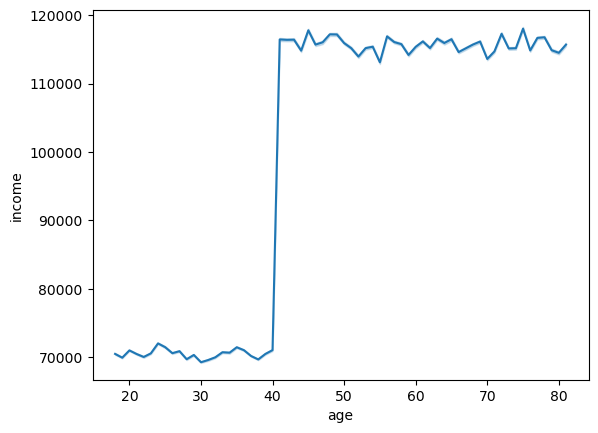

In [40]:
# Create and save a scatterplot chart
scatterplot = sns.lineplot(data = instacart_income, x = 'age', y = 'income')

In [41]:
# Export scatterplot chart
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_income.png'))

The scatterplot above indicates a noticeable relationship between age and income, demonstrating a sharp increase in spending power around age 40. In general, spending power among older age groups is higher than under 40 years old. Customer over 40 years old make a great target for marketing and sales efforts.

In [42]:
instacart.shape

(30629741, 33)

## Exporting dataframe

In [43]:
instacart.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_visualization.pkl'))